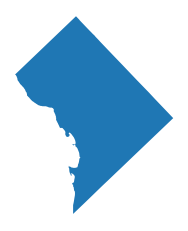

In [1]:
import folium
import openrouteservice as ors

%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import pysal as ps


import pandas as pd
import osmnx as ox
city = ox.geocode_to_gdf('Washington, D.C.')
ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

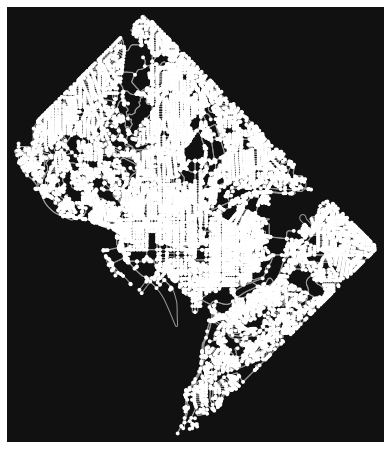

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [2]:
G = ox.graph_from_place('Washington, D.C.', network_type='drive')
ox.plot_graph(G)

In [3]:
G = ox.project_graph(ox.graph_from_place('Washington D.C., USA', network_type='drive'))
G2 = ox.consolidate_intersections(G, tolerance=10, rebuild_graph=True, dead_ends=True)

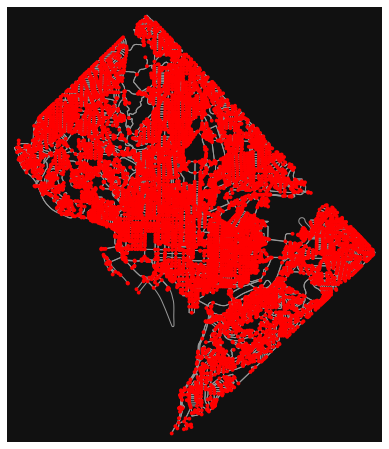

In [4]:
fig, ax = ox.plot_graph(G2, node_color="r")

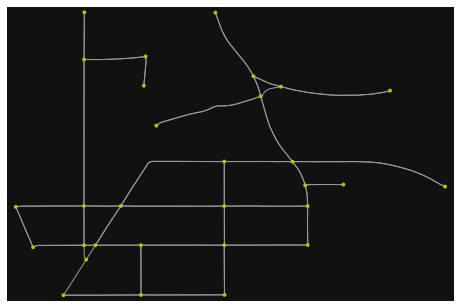

In [5]:
# define a bounding box in DC
north1, south1, east1, west1 = 38.941243, 38.936841, -77.072454, -77.066446

# create network from that bounding box
G1 = ox.graph.graph_from_bbox(north1, south1, east1, west1, network_type='drive', 
                              simplify=True, retain_all=True, truncate_by_edge=True, 
                              clean_periphery=True, custom_filter=None)

fig, ax = ox.plot_graph(G1, node_color="y") #Simplifying the small box


In [6]:
G1.nodes

NodeView((49735507, 49748328, 49748340, 49748353, 49753268, 49753270, 49753272, 49753274, 49753280, 49756456, 49768086, 49774596, 49774604, 49774723, 49774762, 49780129, 49780193, 49784202, 49789979, 49789983, 49802368, 49802377, 49802395, 49805645, 49843926, 49843934, 49858900, 49869544, 49876232, 49884932))

In [7]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pandas as pd

In [8]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
my_map = gpd.read_file('Snow_Removal_Areas.kml', driver='KML')
my_map

,Name,Description,geometry
0,,,"POLYGON ((-77.00884 38.95484, -77.00866 38.954..."
1,,,"POLYGON ((-76.98949 38.94730, -76.98932 38.947..."
2,,,"POLYGON ((-77.00868 38.94796, -77.00870 38.948..."
3,,,"POLYGON ((-77.00595 38.95549, -77.00611 38.955..."
4,,,"POLYGON ((-76.98145 38.94078, -76.98165 38.940..."
...,...,...,...
77,,,"POLYGON ((-77.02132 38.94811, -77.02107 38.948..."
78,,,"POLYGON ((-77.02270 38.94625, -77.02283 38.946..."
79,,,"POLYGON ((-77.03779 38.93769, -77.03771 38.937..."
80,,,"POLYGON ((-76.98398 38.87971, -76.98427 38.879..."


In [9]:
type(my_map)

geopandas.geodataframe.GeoDataFrame

In [10]:
my_map.iloc[0]

Name                                                            
Description                                                     
geometry       POLYGON ((-77.0088447360181 38.9548407423843, ...
Name: 0, dtype: object

In [11]:
coords = my_map.iloc[0]

In [12]:
print(coords)

Name                                                            
Description                                                     
geometry       POLYGON ((-77.0088447360181 38.9548407423843, ...
Name: 0, dtype: object


In [13]:
finalcoords = coords[2]

In [14]:
type(finalcoords)

shapely.geometry.polygon.Polygon

In [15]:
G21 = ox.graph_from_polygon(finalcoords, network_type="drive",
                            simplify=True, retain_all=True, truncate_by_edge=True, 
                            clean_periphery=True, custom_filter=None)

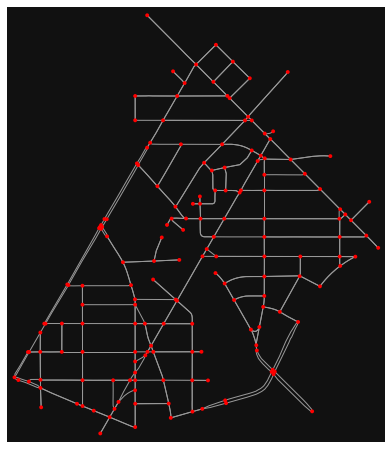

In [16]:
fig, ax = ox.plot_graph(G21, node_color="r")

In [17]:
G21.nodes

NodeView((49226047, 49277063, 49277064, 49718410, 49718413, 49723977, 49730831, 49730840, 49732215, 49734496, 49734511, 49735154, 49735267, 49735269, 49737946, 49737972, 49759133, 49759135, 49759140, 49759145, 49759155, 49759164, 49759170, 49759178, 49765363, 49765376, 49766668, 49766672, 49766674, 49766682, 49766687, 49771433, 49771437, 49771453, 49774382, 49774387, 49774402, 49781334, 49782655, 49782669, 49783679, 49783703, 49789039, 49789074, 49789800, 49789820, 49791004, 49792903, 49792908, 49796016, 49796023, 49796032, 49797973, 49797980, 49798012, 49798033, 49801228, 49801232, 49801237, 49801242, 49802597, 49802625, 49802630, 49806668, 49806678, 49806700, 49806714, 49810634, 49810636, 49810642, 49812437, 49818855, 49819077, 49819083, 49819504, 49819526, 49824902, 49825675, 49825717, 49827854, 49832272, 49832281, 49835955, 49835974, 49835998, 49836036, 49838814, 49838816, 49842461, 49848820, 49848835, 49854291, 49860163, 49860178, 49860181, 49860372, 49863558, 49864639, 49868816, 

In [18]:
G_proj = ox.project_graph(G21)
intersections = ox.consolidate_intersections(
    G_proj, rebuild_graph=False, tolerance=15, dead_ends=False
)
len(intersections)

127

In [19]:
len(G21)

167

In [20]:
G22 = ox.consolidate_intersections(G_proj, rebuild_graph=True, tolerance=15, dead_ends=False)
len(G22)

127

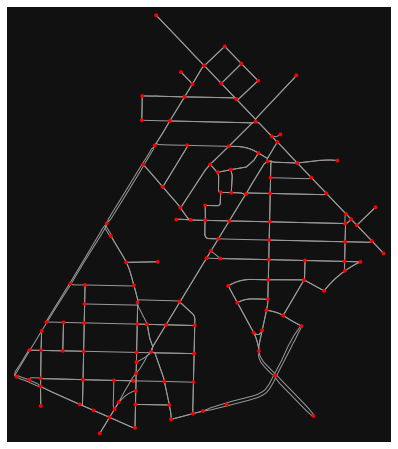

In [21]:
fig, ax = ox.plot_graph(G22, node_color="r")

In [22]:
G23 = ox.distance.add_edge_lengths(G22, precision=3)

In [23]:
type(G22)

networkx.classes.multidigraph.MultiDiGraph

In [24]:
type(G23)

networkx.classes.multidigraph.MultiDiGraph

In [25]:
import networkx as nx

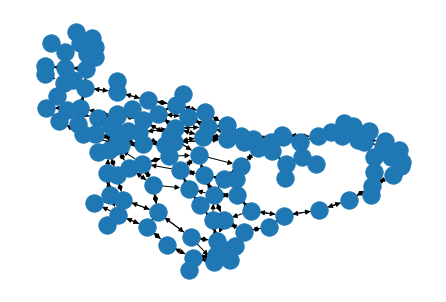

In [26]:
nx.draw(G23)

In [27]:
len(G23)

127

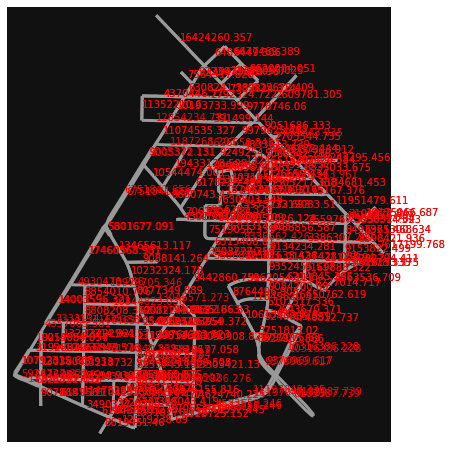

In [28]:
fig, ax = ox.plot_graph(G23, edge_linewidth=3, node_size=0, show=False, close=False)
for _, edge in ox.graph_to_gdfs(G23, nodes=False).fillna("").iterrows():
    text = edge["length"]
    c = edge["geometry"].centroid
    ax.annotate(text, (c.x, c.y), c="r")
plt.show()

In [29]:
G_nx = G21

In [30]:
import igraph as ig
print(ox.__version__)
print(ig.__version__)

weight = "length"

1.1.1
0.9.6


In [31]:
osmids = list(G_nx.nodes)
G_nx = nx.relabel.convert_node_labels_to_integers(G_nx)

osmid_values = {k: v for k, v in zip(G_nx.nodes, osmids)}
nx.set_node_attributes(G_nx, osmid_values, "osmid")

In [32]:
G_ig = ig.Graph(directed=True)
G_ig.add_vertices(G_nx.nodes)
G_ig.add_edges(G_nx.edges())
G_ig.vs["osmid"] = osmids
G_ig.es[weight] = list(nx.get_edge_attributes(G_nx, weight).values())


In [33]:
assert len(G_nx.nodes()) == G_ig.vcount()
assert len(G_nx.edges()) == G_ig.ecount()

In [34]:
source = list(G_nx.nodes())[0]
target = list(G_nx.nodes())[-1]

In [35]:
list1 = G_ig.eccentricity(vertices=None, mode='in')

In [36]:
len(list1)

167

In [37]:
len(G) # Full Washington DC

10027

In [38]:
len(G1) # bounding box

30

In [39]:
len(G2) # consolidated graph

8871

In [40]:
len(G21) # with intersections separated
# fig, ax = ox.plot_graph(G21, node_color="r")

167

In [41]:
len(G22) # # with intersections clubbed together
# fig, ax = ox.plot_graph(G22, node_color="r")

127

In [42]:
len(G23) # created to acquire the distance matrix
# fig, ax = ox.plot_graph(G23, node_color="r")

127

In [43]:
G_ig.vcount() # igraph created from G23

167

In [44]:
len(G_nx) # Same as G23

167

In [45]:
len(G_proj) # projections to check how many intersections can be clubbed

167

In [46]:
list1 = G_ig.eccentricity(vertices=None, mode='in')

In [47]:
len(list1) # eccentrticities

167

In [48]:
G_ig.neighborhood(vertices=None, order=1, mode='all', mindist=0)

[[0, 106],
 [1, 2, 39],
 [2, 1, 85, 150],
 [3, 4, 20, 101],
 [4, 3, 20, 21],
 [5, 112],
 [6, 7, 28, 104],
 [7, 6, 16, 104],
 [8, 106, 115, 158],
 [9, 10, 72, 92],
 [10, 9],
 [11, 58, 59, 71],
 [12, 13],
 [13, 12, 44, 63],
 [14, 15, 26, 27],
 [15, 14, 24, 25],
 [16, 7, 17, 28, 49],
 [17, 16, 18, 49, 54],
 [18, 17, 19, 42, 54],
 [19, 18, 20, 42, 111],
 [20, 3, 4, 19],
 [21, 4, 22, 64, 96],
 [22, 21, 64, 65, 151],
 [23, 78, 114, 116, 144],
 [24, 15, 80, 137],
 [25, 15, 27, 80, 104],
 [26, 14, 52, 141],
 [27, 14, 25, 53, 104],
 [28, 6, 16, 29, 56],
 [29, 28, 30, 54, 90],
 [30, 29, 46, 54, 55],
 [31, 32, 69],
 [32, 31, 38],
 [33, 139],
 [34, 35, 116, 151],
 [35, 34, 36, 65, 97],
 [36, 35, 83, 84],
 [37, 61, 62, 124, 164, 165],
 [38, 32, 48, 69, 107],
 [39, 1, 106, 107],
 [40, 63, 79, 146],
 [41, 77, 115, 144, 146],
 [42, 18, 19, 50],
 [43, 111],
 [44, 13],
 [45, 120, 131, 160],
 [46, 30, 76, 90],
 [47, 48],
 [48, 38, 47, 139],
 [49, 16, 17, 50, 53],
 [50, 42, 49, 51, 88],
 [51, 50],
 [52, 2

In [49]:
G21.nodes

NodeView((49226047, 49277063, 49277064, 49718410, 49718413, 49723977, 49730831, 49730840, 49732215, 49734496, 49734511, 49735154, 49735267, 49735269, 49737946, 49737972, 49759133, 49759135, 49759140, 49759145, 49759155, 49759164, 49759170, 49759178, 49765363, 49765376, 49766668, 49766672, 49766674, 49766682, 49766687, 49771433, 49771437, 49771453, 49774382, 49774387, 49774402, 49781334, 49782655, 49782669, 49783679, 49783703, 49789039, 49789074, 49789800, 49789820, 49791004, 49792903, 49792908, 49796016, 49796023, 49796032, 49797973, 49797980, 49798012, 49798033, 49801228, 49801232, 49801237, 49801242, 49802597, 49802625, 49802630, 49806668, 49806678, 49806700, 49806714, 49810634, 49810636, 49810642, 49812437, 49818855, 49819077, 49819083, 49819504, 49819526, 49824902, 49825675, 49825717, 49827854, 49832272, 49832281, 49835955, 49835974, 49835998, 49836036, 49838814, 49838816, 49842461, 49848820, 49848835, 49854291, 49860163, 49860178, 49860181, 49860372, 49863558, 49864639, 49868816, 

In [50]:
G21.nodes[49226047]

{'y': 38.968246, 'x': -77.001625, 'street_count': 3}

In [51]:
df = pd.DataFrame()
Nodes = []

In [52]:
Nodes = []
for i in G1.nodes:
    Nodes.append(i)
df = pd.DataFrame(Nodes)
df.rename(columns = {0:'Nodes'}, inplace = True)

In [53]:
df = pd.DataFrame(Nodes)
df.rename(columns = {0:'Nodes'}, inplace = True)

In [54]:
lats = []
longs = []

for i in Nodes:
    lats.append(G1.nodes[i].get('y'))
    longs.append(G1.nodes[i].get('x'))
    
df['Latitude'] = lats
df['Longitude'] = longs

In [55]:
df1 = pd.DataFrame()
Nodes = []

Nodes = []
for i in G21.nodes:
    Nodes.append(i)
df1 = pd.DataFrame(Nodes)
df1.rename(columns = {0:'Nodes'}, inplace = True)

df1 = pd.DataFrame(Nodes)

df1.rename(columns = {0:'Nodes'}, inplace = True)

lats = []
longs = []

for i in Nodes:
    lats.append(G21.nodes[i].get('y'))
    longs.append(G21.nodes[i].get('x'))
    
df1['Latitude'] = lats
df1['Longitude'] = longs

df1.head()

subset = df1[['Latitude', 'Longitude']]
tuples = [tuple(x) for x in subset.to_numpy()]

print(tuples)

[(38.968246, -77.001625), (38.968009, -77.003471), (38.968639, -77.004295), (38.9612713, -77.005103), (38.961549, -77.005567), (38.961988, -77.007754), (38.957296, -77.009048), (38.9575282, -77.0085528), (38.9664143, -77.0033751), (38.960246, -77.004695), (38.960641, -77.005141), (38.9583903, -77.0136606), (38.962462, -77.007499), (38.9627005, -77.0072746), (38.9562058, -77.0090522), (38.9557685, -77.0098582), (38.9576607, -77.0084482), (38.9578927, -77.0082748), (38.9587265, -77.0076601), (38.9595963, -77.0070142), (38.9612727, -77.0057725), (38.9620118, -77.0052228), (38.9626982, -77.0047125), (38.9650822, -77.0029398), (38.9555046, -77.0100531), (38.9565868, -77.0093), (38.955699, -77.0090467), (38.956587, -77.0090474), (38.95766, -77.0090483), (38.958729, -77.0090493), (38.959446, -77.00905), (38.966419, -77.009047), (38.967339, -77.009048), (38.9703917, -77.0084638), (38.9637688, -77.0039039), (38.963768, -77.002764), (38.9638183, -77.0000539), (38.9623156, -77.0107051), (38.96733

In [56]:
df1 = pd.DataFrame()
Nodes = []

Nodes = []
for i in G23.nodes:
    Nodes.append(i)
df1 = pd.DataFrame(Nodes)
df1.rename(columns = {0:'Nodes'}, inplace = True)

df1 = pd.DataFrame(Nodes)

df1.rename(columns = {0:'Nodes'}, inplace = True)

lats = []
longs = []

for i in Nodes:
    lats.append(G23.nodes[i].get('y'))
    longs.append(G23.nodes[i].get('x'))
    
df1['Latitude'] = lats
df1['Longitude'] = longs

df1.head()

subset = df1[['Latitude', 'Longitude']]
tuples1 = [tuple(x) for x in subset.to_numpy()]

print(tuples1)

[(4315158.167321721, 326590.88389743573), (4314963.353582538, 326420.38707274187), (4315135.3809152115, 326430.3648057199), (4315206.872272405, 326360.51071173506), (4315058.624832461, 326338.8101697243), (4315279.141191628, 326290.67500365374), (4315123.844180747, 326276.48087270895), (4314390.710862238, 326272.50220166345), (4314385.994587454, 326475.257926464), (4314422.416513284, 326232.9751724663), (4314473.123571169, 326263.93084953283), (4314392.14354482, 326214.4933404644), (4314377.043068021, 326009.86140890187), (4313957.04588271, 325920.9359500276), (4313997.44488629, 325921.8009686413), (4313910.683358869, 325919.6012897312), (4313999.82285114, 325982.3174909229), (4314901.9705091715, 326488.25970466353), (4314276.140066179, 326305.35095634195), (4314301.872021626, 326473.2348326933), (4314205.897470119, 326343.68428627856), (4314087.322382736, 325523.9155977908), (4314006.281887764, 325521.59521424957), (4314124.3439743435, 325543.9544666025), (4314553.4748998005, 326087.8

In [57]:
import numpy
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform 

coordinates_array = numpy.array(tuples1)
dist_array = pdist(coordinates_array)
dist_matrix = squareform(dist_array)


In [58]:
type(dist_matrix)

numpy.ndarray

In [59]:
len(dist_matrix[:50])

50

In [60]:
dist_matrix[:1]

array([[   0.        ,  258.88522593,  162.12834153,  235.46544738,
         271.01636735,  323.66658324,  316.27099134,  830.87683889,
         780.78172155,  818.18574146,  759.06734596,  853.50001649,
         973.52053492, 1375.32649341, 1339.75689501, 1416.62859529,
        1308.47811738,  275.98647014,  927.09284323,  864.33959958,
         983.83205784, 1511.66472334, 1571.69282653, 1471.34358555,
         786.5861404 ,  749.78805529, 1483.53454375, 1534.21824976,
        1450.25395406, 1558.14681211, 1591.92747242, 1179.1342843 ,
        1216.26472895, 1131.17889093, 1066.87288489,  699.40487952,
         717.36184413,  671.48765208,  623.86213975,  540.10433042,
         380.10528053,  362.62954639,  290.862069  , 1632.19209006,
        1489.02569837, 1479.87656602, 1623.80968454, 1237.02017565,
        1160.71847203, 1365.53116211,  674.43704405,  651.1329821 ,
         563.51373426,  477.01933546,  638.73591812,  387.66124548,
         506.81567721,  442.54047926,  510.03619

In [61]:
#eccentricities are the demands (list1)

In [62]:
#rest genetic remains the same 
# check for all the nodes now

In [63]:
import heapq
import random, math

In [64]:
class PrioritySet(object):
    
    def __init__(self):
        self.heap = []
        self.set = set()

    def push(self, d):
        if not d in self.set:
            heapq.heappush(self.heap, d)
            self.set.add(d)

    def pop(self):
        d = heapq.heappop(self.heap)
        self.set.remove(d)
        return d

    def size(self):
        return len(self.heap)

    def __str__(self):
        op = ""
        for i in self.heap:
            op += str(i[0]) + " : " + i[1].__str__()
            op += "\n"
        return op

    def __getitem__(self, index):
        return self.heap[index]

In [65]:
class Position:

    def __init__(self,x,y):
        self.x = x
        self.y = y		

    def __str__(self):
        return "(" + str(self.x) + ", " + str(self.y) + ") "

    def x_coor(self):
        return self.x

    def y_coor(self):
        return self.y

In [66]:
class Vehicle:

    def __init__(self, capacity):
        self.capacity = capacity

    def capacity(self):
        return self.capacity

In [67]:
class Node:

    pos = Position(-1,-1)
    demand = 0

    def __init__(self,name):
        self.name = name

    def setPosition(self,x,y):
        self.pos = Position(x, y)

    def setDemand(self,d):
        self.demand = d

    def __str__(self):
        return "(" + str(self.pos.x) + ", " + \
                   str(self.pos.y) + " )"

In [68]:
def copy(li):
    return [i for i in li]

def getProb():
    return random.random()

def get_random(li):
    index = random.randint(0, len(li)-1)
    return li[index]

def get_distance(cus1, cus2):
    # Euclideian
    #change to vincenty later
    dist = 0 
    dist = math.sqrt(((cus1.pos.x - cus2.pos.x) ** 2) + ((cus1.pos.y - cus2.pos.y) ** 2))
    return dist

def print_tuple(t):
    print( "0"), 
    for i in t:
        print(i),        
    print( "0"),
    print (" -> f: " + str(get_fitness(t)))

def print_population(p):
    for i in p:
        for c in i:
            print(c),
        print("\n")
    
def print_population_heap(p):
    count = 1
    for i in p:
        print (count, " )  ")
        print_tuple(i[1])
        count += 1
        print("\n")



In [69]:
def mutate(chromosome):

    temp = [i for i in chromosome]
    
    if getProb() < MUTATION_RATE:
        left = random.randint(1, len(temp) - 2)
        right = random.randint(left, len(temp) - 1)   
        temp[left], temp[right] = temp[right], temp[left]
    return temp


In [70]:

def crossover(a,b):

    if getProb() < CROSSOVER_RATE:
        left = random.randint(1, len(a) - 2)
        right = random.randint(left, len(a) - 1)
        # print left, " ", right
        c1 = [c for c in a[0:] if c not in b[left:right+1]]
        # print len(c1)
        a1 = c1[:left] + b[left:right+1] + c1[left:]
        # print len(p1)
        c2 = [c for c in b[0:] if c not in a[left:right+1]]
        b1 = c2[:left] + a[left:right+1] + c2[left:]
        return a1, b1
       
    return a, b


In [71]:

def get_fitness(li):
    
    num_custo = len(li)
    fitness = 0

    for i in range(num_custo - 1):
        fitness += get_distance(li[i], li[i+1])

    fitness += get_distance(DEPOT, li[0])
    fitness += get_distance(li[-1], DEPOT)

    # chk for valid capacity
    temp = copy(li)
    temp.insert(0,DEPOT)
    temp.append(DEPOT)
    valid = 1
    curr_demand = 0
    for i in range(len(temp)):
        if temp[i] == DEPOT and curr_demand > CAPACITY:
            fitness = INF
        elif temp[i] == DEPOT:
            curr_demand = 0
        else:
            curr_demand += temp[i].demand

    return fitness

In [72]:

def getPopulationFitness(p):
    
    h = PrioritySet()
    for i in p:
        h.push((get_fitness(i),i))
    return h

def create_new():

    TempSet = copy(Nodes)
    chromosome = []
    while len(TempSet) > 0:
        index = (int)(getProb() * len(TempSet))
        chromosome.append(TempSet.pop(index))

    return chromosome 

In [73]:
def Genetic_Algo():
    
    print ("POPULATION GENERATED... EVOLUTION BEGINING ...")
    minimum_chrom = h[0]
    print( "Curr Min: ", minimum_chrom[0])
    count = 0
    # while h[0][0] > 1800:
    while count < 1000:
        ax = h.pop()
        bx = h.pop()
        a,b = crossover(list(ax[1]),list(bx[1]))
        a = mutate(a)
        while get_fitness(a) == INF:
            a = create_new()
        b = mutate(b)
        while get_fitness(b) == INF:
            b = create_new()
        if get_fitness(a) != INF:
            h.push((get_fitness(a),tuple(a)))
        else:
            h.push(ax)
        if get_fitness(b) != INF:
            h.push((get_fitness(b),tuple(b)))
        else:
            h.push(bx)

        while h.size() < POPULATION_SIZE:
            TempSet = copy(Nodes)
            chromosome = []
            count += 1
            while len(TempSet) > 0:
                index = (int)(getProb() * len(TempSet))
                chromosome.append(TempSet.pop(index))
            h.push((get_fitness(chromosome),tuple(chromosome)))
        count = count + 1
        
        if count % 1000 == 0:
            print (count),
            print (" Generation done")

        if h[0][0] < minimum_chrom[0]:
            minimum_chrom = h[0] 
            print ("CurrMin: ",)
            print (minimum_chrom[0])
    
    print_tuple(minimum_chrom[1])
    print (count)
    


In [74]:

def initialize_population():

    while len(population) < POPULATION_SIZE:
        TempSet = copy(Nodes)
        chromosome = []
        while len(TempSet) > 0:
            index = (int)(getProb() * len(TempSet))
            chromosome.append(TempSet.pop(index))

        if get_fitness(chromosome) != INF:
            population.add(tuple(chromosome))

In [75]:
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.9
POPULATION_SIZE = 100
FITNESS = 0
TRUCKS = 15
DEPOT = None
CAPACITY = 100
INF = float("inf")

In [76]:

def create_data_array():
    locations = tuples[:50]
    

    demands = list1[:50]


    for i in range(1,len(locations)):
        c = Node(i)
        c.setPosition(locations[i][0],locations[i][1])
        c.setDemand(demands[i])
        Nodes.append(c)
    
    i = 0
    c = Node(i)
    c.setPosition(locations[i][0],locations[i][1])
    c.setDemand(demands[i])
    global DEPOT
    DEPOT = c

    for j in range(TRUCKS-1):
        Nodes.append(DEPOT)


In [77]:
len(tuples)

167

In [78]:
len(list1)

167

In [79]:
print(tuples)

[(38.968246, -77.001625), (38.968009, -77.003471), (38.968639, -77.004295), (38.9612713, -77.005103), (38.961549, -77.005567), (38.961988, -77.007754), (38.957296, -77.009048), (38.9575282, -77.0085528), (38.9664143, -77.0033751), (38.960246, -77.004695), (38.960641, -77.005141), (38.9583903, -77.0136606), (38.962462, -77.007499), (38.9627005, -77.0072746), (38.9562058, -77.0090522), (38.9557685, -77.0098582), (38.9576607, -77.0084482), (38.9578927, -77.0082748), (38.9587265, -77.0076601), (38.9595963, -77.0070142), (38.9612727, -77.0057725), (38.9620118, -77.0052228), (38.9626982, -77.0047125), (38.9650822, -77.0029398), (38.9555046, -77.0100531), (38.9565868, -77.0093), (38.955699, -77.0090467), (38.956587, -77.0090474), (38.95766, -77.0090483), (38.958729, -77.0090493), (38.959446, -77.00905), (38.966419, -77.009047), (38.967339, -77.009048), (38.9703917, -77.0084638), (38.9637688, -77.0039039), (38.963768, -77.002764), (38.9638183, -77.0000539), (38.9623156, -77.0107051), (38.96733

In [80]:
import numpy as np
arrayofTuples = np.array_split(tuples, 5)

In [81]:
tupleNew = tuples[0::3]

In [82]:
print(tupleNew)

[(38.968246, -77.001625), (38.9612713, -77.005103), (38.957296, -77.009048), (38.960246, -77.004695), (38.962462, -77.007499), (38.9557685, -77.0098582), (38.9587265, -77.0076601), (38.9620118, -77.0052228), (38.9555046, -77.0100531), (38.956587, -77.0090474), (38.959446, -77.00905), (38.9703917, -77.0084638), (38.9638183, -77.0000539), (38.9672567, -77.0044528), (38.958724, -77.006272), (38.9557197, -77.0046262), (38.967827, -77.006643), (38.957664, -77.005823), (38.9587282, -77.008576), (38.95766, -77.012617), (38.960184, -77.009251), (38.962705, -77.006572), (38.962695, -76.999113), (38.9664179, -77.007691), (38.960511, -77.002765), (38.9612673, -77.001013), (38.9649811, -77.0027452), (38.9587321, -77.012612), (38.9643969, -77.0007941), (38.962007, -76.999097), (38.9587313, -77.0116109), (38.959775, -77.002767), (38.962009, -77.002766), (38.9566036, -77.0136545), (38.961139, -77.006901), (38.9628593, -76.998827), (38.965064, -76.9995527), (38.9596373, -77.0070736), (38.9657115, -77.

In [83]:
len(arrayofTuples[0])

34

In [84]:
len(arrayofTuples[1])

34

In [85]:
len(arrayofTuples[2])

33

In [86]:
len(arrayofTuples[3])

33

In [87]:
len(arrayofTuples[4])

33

In [88]:
len(arrayofTuples)

5

In [213]:
Nodes = []
population = set()

if __name__ == '__main__':
    create_data_array()
    initialize_population()
#     print_population("The pop is:" + population)
    h = getPopulationFitness(population)
#     print_population_heap("The heap is:" + h)
    Genetic_Algo()

POPULATION GENERATED... EVOLUTION BEGINING ...
Curr Min:  0.3971857569196007
CurrMin: 
0.3837510706444688
CurrMin: 
0.38345631771622346
1000
 Generation done
0
(38.968246, -77.001625 )
(38.9575282, -77.0085528 )
(38.962462, -77.007499 )
(38.965511, -77.004816 )
(38.968246, -77.001625 )
(38.9664143, -77.0033751 )
(38.9638183, -77.0000539 )
(38.967338, -77.007005 )
(38.9623156, -77.0107051 )
(38.968246, -77.001625 )
(38.962275, -77.006715 )
(38.961988, -77.007754 )
(38.9637688, -77.0039039 )
(38.968246, -77.001625 )
(38.968246, -77.001625 )
(38.961549, -77.005567 )
(38.968272, -77.007205 )
(38.9565868, -77.0093 )
(38.958729, -77.0090493 )
(38.963768, -77.002764 )
(38.963153, -77.007089 )
(38.968246, -77.001625 )
(38.9555046, -77.0100531 )
(38.956587, -77.0090474 )
(38.9703917, -77.0084638 )
(38.968009, -77.003471 )
(38.968246, -77.001625 )
(38.9612713, -77.005103 )
(38.9594451, -77.011612 )
(38.968246, -77.001625 )
(38.967827, -77.006643 )
(38.968246, -77.001625 )
(38.9650822, -77.002939

In [ ]:
# all nodes : 10 trucks : 4:07 - 4:23 interrupted

In [ ]:
# 127 nodes : 20 trucks : 4:23 - interrupt

In [ ]:
# 50 nodes : 20 trucks : 4:40 

In [ ]:
# 50 nodes : 15 trucks : 4:42 : 4:45

In [ ]:

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = dist_matrix[:50]
    
    
    
#     [
#         [
#             0, 548, 776, 696, 582, 274, 502, 194, 308, 194, 536, 502, 388, 354,
#             468, 776, 662
#         ],
#         [
#             548, 0, 684, 308, 194, 502, 730, 354, 696, 742, 1084, 594, 480, 674,
#             1016, 868, 1210
#         ],
#         [
#             776, 684, 0, 992, 878, 502, 274, 810, 468, 742, 400, 1278, 1164,
#             1130, 788, 1552, 754
#         ],
#         [
#             696, 308, 992, 0, 114, 650, 878, 502, 844, 890, 1232, 514, 628, 822,
#             1164, 560, 1358
#         ],
#         [
#             582, 194, 878, 114, 0, 536, 764, 388, 730, 776, 1118, 400, 514, 708,
#             1050, 674, 1244
#         ],
#         [
#             274, 502, 502, 650, 536, 0, 228, 308, 194, 240, 582, 776, 662, 628,
#             514, 1050, 708
#         ],
#         [
#             502, 730, 274, 878, 764, 228, 0, 536, 194, 468, 354, 1004, 890, 856,
#             514, 1278, 480
#         ],
#         [
#             194, 354, 810, 502, 388, 308, 536, 0, 342, 388, 730, 468, 354, 320,
#             662, 742, 856
#         ],
#         [
#             308, 696, 468, 844, 730, 194, 194, 342, 0, 274, 388, 810, 696, 662,
#             320, 1084, 514
#         ],
#         [
#             194, 742, 742, 890, 776, 240, 468, 388, 274, 0, 342, 536, 422, 388,
#             274, 810, 468
#         ],
#         [
#             536, 1084, 400, 1232, 1118, 582, 354, 730, 388, 342, 0, 878, 764,
#             730, 388, 1152, 354
#         ],
#         [
#             502, 594, 1278, 514, 400, 776, 1004, 468, 810, 536, 878, 0, 114,
#             308, 650, 274, 844
#         ],
#         [
#             388, 480, 1164, 628, 514, 662, 890, 354, 696, 422, 764, 114, 0, 194,
#             536, 388, 730
#         ],
#         [
#             354, 674, 1130, 822, 708, 628, 856, 320, 662, 388, 730, 308, 194, 0,
#             342, 422, 536
#         ],
#         [
#             468, 1016, 788, 1164, 1050, 514, 514, 662, 320, 274, 388, 650, 536,
#             342, 0, 764, 194
#         ],
#         [
#             776, 868, 1552, 560, 674, 1050, 1278, 742, 1084, 810, 1152, 274,
#             388, 422, 764, 0, 798
#         ],
#         [
#             662, 1210, 754, 1358, 1244, 708, 480, 856, 514, 468, 354, 844, 730,
#             536, 194, 798, 0
#         ],
#     ]
    data['num_vehicles'] = 4
    data['depot'] = 0
    return data


def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f'Objective: {solution.ObjectiveValue()}')
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    print('Maximum of the route distances: {}m'.format(max_route_distance))



def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        3000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)
    else:
        print('No solution found !')


if __name__ == '__main__':
    main()

In [174]:
len(GA) #count of amsterdam nodes

12169